# Support Vector Machine Assignment

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [8]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [10]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for 

---

each field.

---



In [14]:
data.groupby('Admitted').mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [18]:
data['Admitted'].value_counts()


1    247
0    153
Name: Admitted, dtype: int64

In [19]:
data['Admitted'].value_counts(normalize=True)


1    0.6175
0    0.3825
Name: Admitted, dtype: float64

### What percent of students with research experience were admitted?

In [23]:
data.groupby('Research').mean()
#data.groupby("Research").agg({"Admitted": "mean"})


,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Admitted
Research,,,,,,,
0,309.491713,104.143646,2.524862,2.908840,3.060773,8.257182,0.364641
1,322.853881,110.109589,3.552511,3.805936,3.776256,8.881370,0.826484


### What percent of students admitted had research experience?

In [24]:
data.groupby('Admitted').mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

In [26]:
data.groupby('SOP').agg({"Admitted": "mean"})


,Admitted
SOP,
1.0,0.000000
1.5,0.050000
2.0,0.272727
2.5,0.425532
3.0,0.546875
3.5,0.614286
4.0,0.785714
4.5,0.924528
5.0,0.945946


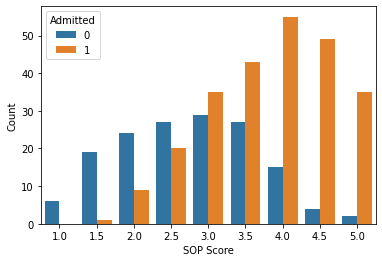

In [27]:
sns.countplot("SOP", hue="Admitted", data=data)
plt.legend(loc="upper left", title="Admitted")
plt.xlabel("SOP Score")
plt.ylabel("Count")
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

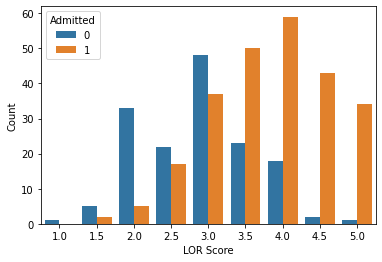

In [28]:
sns.countplot("LOR", hue="Admitted", data=data)
plt.legend(loc="upper left", title="Admitted")
plt.xlabel("LOR Score")
plt.ylabel("Count")
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

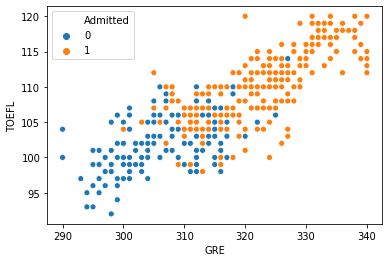

In [31]:
sns.scatterplot("GRE", "TOEFL", hue="Admitted", data=data)
plt.show()


### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

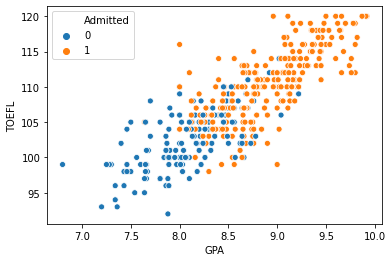

In [32]:
sns.scatterplot("GPA", "TOEFL", hue="Admitted", data=data)
plt.show()

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

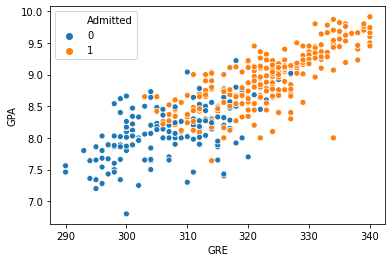

In [33]:
sns.scatterplot("GRE", "GPA", hue="Admitted", data=data)
plt.show()

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [40]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="Admitted")
y = data["Admitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.20, random_state=55)


### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [45]:

model = SVC(kernel="linear")
model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
model.score(X_train, y_train)

0.884375

In [47]:
model.score(X_test, y_test)

0.825

### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [48]:
y_predict = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict), 
             index = ['Actually 0', 'Actually 1'],
             columns=['Predicted 0', 'Predicted 1'],)

,Predicted 0,Predicted 1
Actually 0,21,4
Actually 1,10,45


In [56]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.68      0.84      0.75        25
           1       0.92      0.82      0.87        55

    accuracy                           0.82        80
   macro avg       0.80      0.83      0.81        80
weighted avg       0.84      0.82      0.83        80



In [ ]:
wow, amazing predictions. good job, ML!